# Normal Distribution

This is the probability density function in latex.

$ \frac{1} {\sigma \sqrt { 2 \pi }} e -\frac{1}{2}  (\frac{ x - \mu } {\sigma})^2 \\[1ex] $ 

In [2]:
import numpy as np
## numerical
import matplotlib.pyplot as plt
## graphs
import scipy.stats as st
## imports scipy stats for inbuilt maths functions
import seaborn as sb
## imports seaborn for creating graphs
import pandas as pd
## Used for analysis
import math
## Imports Maths functions
from scipy.stats import norm
## imports normal distribution
from scipy.stats import binom
## imports binomial distribution
from scipy import stats
# imports stats
from scipy.stats import multivariate_normal
# imports multivariate normal
from mpl_toolkits.mplot3d import Axes3D
## Used to create 3d graphs

## What is normal distribution?

A Normal Distribution is also known as a Gaussian distribution or famously Bell Curve. People use both words interchangeably, but it means the same thing. It is a continuous probability distribution.[1]

I firstly used numpy random to draw random samples from a normal (Gaussian) distribution. The probability density function of the normal distribution, first derived by De Moivre and 200 years later by both Gauss and Laplace independently, is often called the bell curve because of its characteristic shape.The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution. The normal distribution is a continuous probability distribution that is symmetrical around its mean, most of the observations cluster around the central peak, and the probabilities for values further away from the mean will go in both directions.[2].

A key principle that I'm going to give examples of in the notebook is the central limit theorm(CLT). In probability theory, the central limit theorem (CLT) states that the distribution of a sample variable approximates a normal distribution  as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population's actual distribution shape. [3] 

Probability Density Function for Gaussian distribution in Latex:

$ p(x) = \frac{1} {\sqrt { 2 \pi \sigma^2 }} e - (\frac{ (x - \mu) ^2 } {2\sigma^2}) \\[1ex] $ 

In [11]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
## generates a hundred random numbers based on sigma

print (s)

[-5.72491126e-02 -4.08048716e-02  6.26461483e-02 -1.67179429e-01
  5.66310444e-02  1.36068921e-02  9.96917975e-02 -3.53372859e-02
 -7.17544691e-02  3.45388386e-02 -1.43403621e-01  1.05727427e-01
  3.78052872e-02  8.78765079e-03  1.11747658e-01 -3.77508603e-02
  6.74064387e-02 -4.13510093e-02  4.30687390e-02 -6.53710906e-02
 -1.12613283e-03 -1.04008980e-01  4.68519177e-02 -1.17923454e-02
  1.36707256e-01  1.78398297e-01 -4.00827652e-02  2.20823713e-02
  1.20661757e-01 -2.96376097e-02 -6.43366773e-02 -2.82714466e-01
 -2.68384972e-02  5.12850051e-02 -8.39838336e-02  7.35495824e-02
  2.43601616e-01  1.64556643e-01 -9.16176332e-02 -5.20009148e-02
  2.31677527e-01 -1.67665848e-01  7.81149864e-02  8.64955920e-02
 -1.98974358e-01  1.03588155e-01 -7.77799401e-02  5.31921827e-02
 -4.96860482e-02  2.05254243e-01  1.99950032e-01  2.00528690e-02
  3.78242225e-02 -5.38279759e-02  1.77762864e-02 -4.19716921e-02
  2.76179720e-02 -2.30539216e-03  5.63651521e-02 -5.18375237e-02
  8.91402456e-02 -2.55677

In [12]:
abs(mu - np.mean(s))

## abs returns the absolute value of the specified number

## verifies the mean and the variance of the numbers above

0.0036791226065646053

In [13]:
abs(sigma - np.std(s, ddof=1))

## ddof=1 provides an unbiased estimator of the variance of the infinite population.

## generates the sigma - standard deviation 

0.0004326913127604276

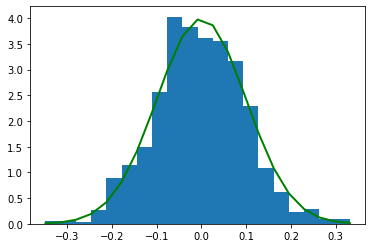

In [17]:
## code adapted from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

count, bins, ignored = plt.hist(s, 20, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         ## standard deviation formula based on the latex formula from above
         linewidth=2, color='g')
plt.show()

This will display a histogram of the samples in the probability density function.

It looks like a bell curve based on the formula which we used above based on the derivation by De Moivre.

## Scipy stats and comparing a Normal and Frozen CDF 

There is also a built in scipy variable that I will also investigate further. Scipy allows you to shift and/or scale the distribution use the loc and scale parameters and then test whether the values will result in a normal distribution. 

The below example uses Percent-Point Function (PPF) and allows us to compare it to the Cumulative Distribution Function (CDF).

Cumulative Distribution Function (CDF) is used to describe the probability distribution of random variables. It can be used to describe the probability for a discrete, continuous or mixed variable. It is obtained by summing up the probability density function and getting the cumulative probability for a random variable. [4]

Probability Point Function or PPF is the inverse of the CDF which is why it is being used in the example below but I will quickly explain what it is used for.The probability density function is a derivative of the distribution function, which characterizes the density with which the values of the random variable are distributed at a given point. [5]

The example below shows us how valuable scipy is for developing graphs and how built in functions allow us to test whether the graph has a normal CDF.

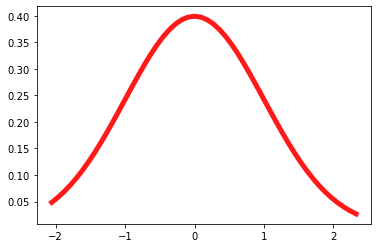

In [55]:
## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

fig, ax = plt.subplots(1, 1)

## creates a plot

mean, var, skew, kurt = norm.stats(moments='mvsk')

## creates 4 moments

x = np.linspace(norm.ppf(0.02),
                norm.ppf(0.99), 50)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.9, label='norm pdf')

## Displays the PDF

## alpha changes the thickness and colour of line, 0.9 makes line thicker

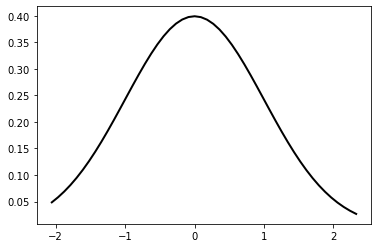

In [35]:
## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

fig, ax = plt.subplots(1, 1)
## creates plot with 1 row and 1 column

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.02),
                norm.ppf(0.99), 50)

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [24]:

## This will check the accuracy
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

## np.allcose returns true if two arrays are element-wise equal within a tolerance.

True

In [50]:
## This will check the accuracy
vals = norm.ppf([0.12, 0.8, 0.991])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
## Changung figurs to 0.12-0.8 will display false

False

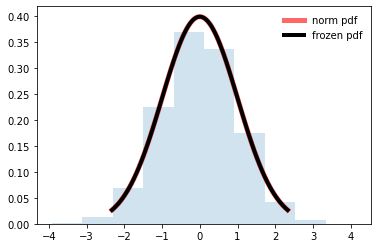

In [16]:
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
## creates norm PDF graph
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=4, label='frozen pdf')

r = norm.rvs(scale = 1, size=10000)
## norm.rvs generates random normal distribution numbers according to the scale which is the standard deviation

ax.hist(r, density=True, alpha=0.2)
ax.legend(loc='best', frameon=False)
## displays in best location and removes frame
plt.show()
## displays plot

## Normal distribution PDF with multiple standard deviations

I then decided I wanted to graph multiple different standard deviations on a graph as I wanted to see if we would see a similar bell chart given multiple different means and standard deviations.

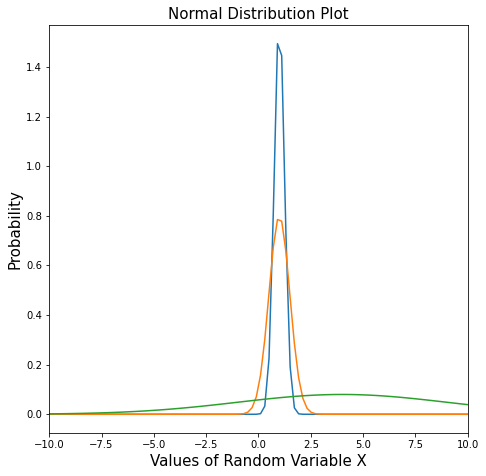

In [13]:
## I adapted code from https://vitalflux.com/normal-distribution-explained-python-examples/

# Values of random variable
#
x = np.linspace(-10, 10, 100)
#
plt.figure(figsize=(7.5,7.5))
#
# Normal distribution with mean 1 and std as 0.25
#
plt.plot(x, stats.norm(1, 0.25).pdf(x))
#
# Normal distribution with mean 1 and std as 0.5
#
plt.plot(x, stats.norm(1, 0.5).pdf(x))
#
# Normal distribution with mean 4 and std as 5
#
plt.plot(x, stats.norm(4, 5).pdf(x))

plt.xlim(-10, 10)
# sets x bar limit
plt.title('Normal Distribution Plot', fontsize='15')
## plots title
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
## probability estimates of different values of random variable given the standard normal distribution
plt.show()
## plots graph

I think the key thing that I have spotted in doing this graph, is even with multiple standard deviations and means, we still see the bell curve graph. This graph is useful for displaying a lot of information that shows the standard deviation.

## Probabilities of a standard normal distribution.

To find the probability of a value occurring within a range in a normal distribution, we just need to find the area under the curve in that range. i.e. we need to integrate the density function. We can us scipy.norm class function to calculate probabilities from the normal distribution. This is easier to explain, given a scenario. [6] We have data of the heights of adults in a town and the data follows a normal distribution, we have a sufficient sample size with mean equals 5.6 and the standard deviation is 2.

C:\Users\Kenne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


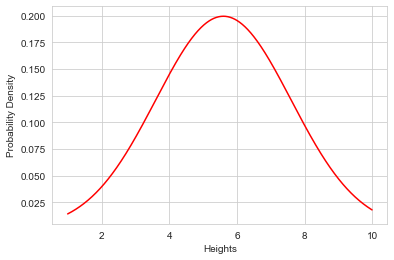

In [6]:
## Probabilities for Normally Distributed Data

# Creating distribution
data1 = np.arange(1,10,0.01)
pdf = norm.pdf(data1 , loc = 5.6 , scale = 2)
 
## loc documents the height and scale documents the standard deviation   

##Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data1, pdf , color = 'red')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

plt.show()

In [14]:
LowProb = norm(loc = 5.6 , scale = 2).cdf(4.5)

print (LowProb)
## The area under the curve as shown in the figure above will be the probability that the height of the person will be smaller than 4.5 ft 

0.2911596867883464


This shows us that there is a 29.11% chance if a person is chosen randomly from the normal distribution with a mean of 5.6 and a standard deviation of 2, then the height of the person will be below 4.5 ft.

In [61]:
cdf_upper_limit = norm(loc = 5.6 , scale = 2).cdf(6.5)
cdf_lower_limit = norm(loc = 5.6 , scale = 2).cdf(4.5)
    
prob = cdf_upper_limit - cdf_lower_limit
print(prob)

0.3824850929237336


In [49]:
cdf_value = norm(loc = 5.6 , scale = 2).cdf(6.5)
HighProb = 1- cdf_value
print(HighProb)

0.32635522028791997


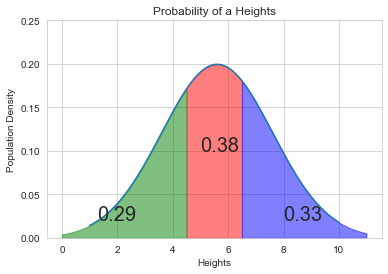

In [92]:
## adapted code idea from https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8#053b

fig, ax = plt.subplots()
# for distribution curve
x= np.arange(1,10,0.01)
## arranges x axis between 1 and 1-0
ax.plot(x, norm.pdf(x,loc=5.6,scale=2))
## Sets 5.6 as mean and 2 as standard deviation
ax.set_title("Probability of a Heights")
## Sets Title
ax.set_xlabel('Heights')
## Sets X label
ax.set_ylabel('Population Density')
## Sets Y Label
ax.grid(True)
# for fill_between
px=np.arange(0,4.5,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=5.6,scale=2),alpha=0.5, color='g')
## sets standard deviation and mean
# for text
# for fill_between
px=np.arange(4.5,6.5,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=5.6,scale=2),alpha=0.5, color='r')

px=np.arange(6.5,11,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=5.6,scale=2),alpha=0.5, color='b')

ax.text(1.25,0.02,round(LowProb,2), fontsize=20)
ax.text(5,0.1,round(prob,2), fontsize=20)
ax.text(8,0.02,round(HighProb,2), fontsize=20)
plt.show()

This to me is a very valuable implementation of normal distribution and more specifically CDF. I think it shows a real life implementation of normal distribution and how someone may use this in a survey project for a city. The inbuilt functions into scipy gave me the tools to develop the calculations and the idea and matplotlib gave me the tools to develop the graph.

If we were to take someone random on the street between 30-40 and ask their height, assuming that gender doesn't effect height. Normal distribution allows us to make a fairly educated guess as to what their actual age would be, and using CDF allows us to know the probability of all outcomes and a figure on it.

## Confidence Intervals in Normal Distribution

A confidence interval for a mean is a range of values that is likely to contain a population mean with a certain level of confidence. With a small sample (number under 30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean. [7] An example may be that there are 20 people working in an office and we may want to get their mean height in feet, we can use scipy stats to do this.

In [17]:
#define sample data
data = [5.5, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.8, 5.9, 6.0, 6.0, 6.1, 6.2, 6.2, 6.3]

#create 95% confidence interval for population mean weight
interval1, interval2 = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

print (interval)

(5.707015987779206, 5.999650678887461)


In [5]:
#define sample data
data2 = [5.5, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.8, 5.9, 6.0, 6.0, 6.1, 6.2, 6.2, 6.3]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(5.650253125198283, 6.056413541468384)

I firstly generated the data to 95% interval as it gives us a closer range of 5.707015987779206 to 5.999650678887461. The 99% gives us a further away interval of 5.650253125198283 to 6.056413541468384 due to the wider confidence interval.

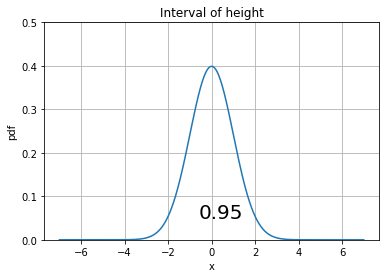

In [40]:
fig, ax = plt.subplots()
### creates plot
x= np.arange(-7,7,0.001)
## x axis between -7 and 7
ax.plot(x, norm.pdf(x))
## sets title as interval of height
ax.set_title("Interval of height")
## sets x label as x
ax.set_xlabel('x')
## sets y label as pdf
ax.set_ylabel('pdf')
ax.grid(True)
# configures grid lines
px=np.arange(interval1, interval2 ,0.01)
## puts spaced elements between numbers
ax.set_ylim(0,0.5)
## sets y limit
ax.fill_between(px,norm.pdf(px),alpha=0.5)
ax.text(-0.6,0.05,"0.95", fontsize=20)
## adds text to graph
plt.show()

If we’re working with larger samples over 30 numbers, we can assume that the sampling distribution of the sample mean is normally distributed and can instead use the norm.interval() function from the scipy.stats library. [8]

I will use an example of a height in inches of 560 per day. The example may be rainfall over a two month interval and a measurement of an estimated rainfall.

In [44]:
#define sample data
np.random.seed(0)
data = np.random.randint(5, 30, 60)
## develops 60 random numbers between 5 and 30

#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(14.984670710137127, 19.048662623196204)

In [46]:
#define sample data
np.random.seed(0)
data = np.random.randint(5, 30, 60)

#create 99% confidence interval for population mean weight
st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))

(14.346171305115446, 19.687162028217884)

This would mean that there is between a 95% chance, between 14.984670710137127 to 19.048662623196204 interval of rainfall over a 60 day period. This would mean that there is between a 99% chance, between 14.346171305115446, 19.687162028217884 interval of rainfall over a 60 day period.

I could see this being a very valuable resource, assuming that normal distribution applies and the data was structured quite closely, you would have an idea of an expected result.

I think this could be useful for esepcially financial forecasting, assuming you had a set income daily/monthly income, you could use intervals to account for a chance of a certain income vs spending and then give a confidence level based on the historic data, it would give an idea of future forecasting.

## Multivariate Normal Distribution

The multivariate normal distribution is a multidimensional generalisation of the one-dimensional normal distribution. It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with each other. Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector , which is the expected value of the distribution; and the covariance matrix , which measures how dependent two random variables are and how they change together. It can also be described as a generalization of the one-dimensional normal distribution to higher dimensions.[9] This is also an example of central limit theorm.

There is an inbuilt function from scipy.stats for multivariate which I will use for the next part. [10]

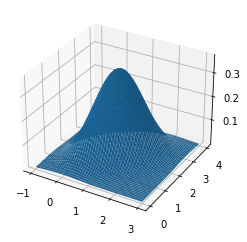

In [56]:
## code adapted from https://stackoverflow.com/questions/48465683/visualizing-a-multivariate-normal-distribution-with-numpy-and-matplotlib-in-3-di

x = np.linspace(-1, 3, 100)
## sets spaced line sbetween -1 and 3, with a 100 values 
y = np.linspace(0, 4, 100)
## sets spaced line sbetween 0 and 4, with a 100 values 
X, Y = np.meshgrid(x, y)
## used to create pairs of co-ordinates between x and y
pos = np.dstack((X, Y))
## arranges arrays in a sequence depth wise
mu = np.array([1, 2])
## creates an array between 1 and 2
cov = np.array([[.5, .25],[.25, .5]])
## creates a second array between .5 and .25 and .25 and .5
rv = multivariate_normal(mu, cov)
## inbuilt multivariate function from scipy stats to create graph
Z = rv.pdf(pos)
## plots pdf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
## creates 3D plot
ax.plot_surface(X, Y, Z)
## Plots the multivariate graph

## Standardized Normal Distribution

The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1. Any normal distribution can be standardized by changing the values into z scores. Z scores show how many standard deviations from the mean each value lies. [11]  The z-score allows us to determine how usual or unusual a data point is in a distribution and to compare data points. The z-score is calculated by dividing the difference between the value and the mean by the standard deviation of the distribution.[12]

In [4]:
## code adapted from https://datagy.io/python-z-score/

values = [3,3,3,6,6,7,8,14,14,15,15,18]

zscores = stats.zscore(values)

## stats.zscore is an inbuilt function that allows 
print(zscores)
## prints results
## formula is subbtracting the mean from the value and dividing this by the standard deviation, all results are positive or negative and between -3 and 3 which proves standard deviation.

[-1.20286898 -1.20286898 -1.20286898 -0.63308894 -0.63308894 -0.44316226
 -0.25323558  0.88632451  0.88632451  1.07625119  1.07625119  1.64603124]


In [9]:
## code adapted from https://datagy.io/python-z-score/

## Creates manual dataframe 

df = pd.DataFrame.from_dict({
    'Name': ['Steve', 'Rick', 'Tom', 'Mitch', 'Mary'],
    'Age': [23, 31, 67, 32, 10],
    'Income': [65000, 91000, 47000, 26000, 15000],
    'Education' : [5, 7, 3, 4, 4]
})

In [10]:
df['Income zscore'] = stats.zscore(df['Income'])

## takes the first 5 of income and prints it
print(df.head())

    Name  Age  Income  Education  Income zscore
0  Steve   23   65000          5       0.594817
1   Rick   31   91000          7       1.549461
2    Tom   67   47000          3      -0.066091
3  Mitch   32   26000          4      -0.837150
4   Mary   10   15000          4      -1.241038


## Central Limit Theorm

The first thing when I read about central limit theorm that came to mind was exit polls for an election. This would usually be a survey of maybe 1,000 people and then scaled upwards based on what they advised. For the purposes of this walkthrough I will take two presidental canditates which we will call Mary and Tom. Faria [13] has created a model to use CLT to predict an exit poll, which I am going to use a base below for the example.

In [3]:
## I used this for idea for code - https://stackoverflow.com/questions/47012474/bernoulli-random-number-generator

def get_opinion_from_random_person():
    # Setting probability for demonstration purposes
    probability_of_Mary_win = 0.59
    return np.random.binomial(
        n = 1,
        p = probability_of_Mary_win)

get_opinion_from_random_person()

## returns 0 or 1, 1 will mean the person votes for Mary

0

In [4]:
## I adapted this code from https://towardsdatascience.com/election-poll-simulation-margin-of-error-and-central-limit-theorem-with-python-43f96909a4c6

def get_sample_from_distribution(n):
    """
    Creates an array of size n.
    Each value will be 1 if some person would vote on Mary and
    0 if he would vote on Tom.
    """
    sample_opinions = []
    for i in range(n):
        sample_opinions.append(get_opinion_from_random_person())
    
    return sample_opinions

example = get_sample_from_distribution(10)
print(example)

## prints 10 vote examples

[1, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [8]:
def get_n_samples_from_distribution(samples_number, sample_size):
## defines a function
    
    ### Get multiple samples from our target 'unknown distribution'.
    
    people_per_day = [sample_size] * samples_number
    ## creates a parameter
    week_samples = list(map(get_sample_from_distribution, people_per_day))
    ## uses list for multiple examples
    return week_samples
    ## returns weekly or scaled examples

def get_n_sample_means_from_distribution(samples_number, sample_size):
    samples = get_n_samples_from_distribution(
        samples_number = samples_number,
        sample_size = sample_size)

    return list(map(np.mean, samples))

sample_means = get_n_sample_means_from_distribution(5, 100)
## prints 5 samples with the mean being out of 100
print(sample_means)

## scales up our votes per day, and means Mary would have 0.7, 0.58, 0.61, 0.55, 0.59 chances of winning

[0.7, 0.58, 0.61, 0.55, 0.59]


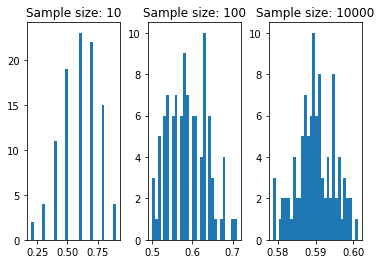

In [13]:
fig, axes = plt.subplots(1,3, figsize = (6, 4))
## creates one row with 3 columns with a figsize of 6 width and 4 height
fig.subplots_adjust(hspace=0.4, wspace=0.3)
## hspace specifies white spaceon  the left and right of graphs
axes = axes.ravel()
## ravel() function creates a contiguous flattened array

sample_size = [10, 100, 10000]
## creates a sample size of 10,100,1000
for i in range(len(sample_size)):
    sample_means = get_n_sample_means_from_distribution(
        samples_number = 100,
        ## sample size of 100 is scaled upwards
        sample_size = sample_size[i])    
    axes[i].hist(sample_means, bins=30)
    axes[i].set_title("Sample size: {0}".format(sample_size[i]))

The key findings that I can see is when we scale up, we still see the familiar bell shaped curve. It also tells us that when we scale up, Mary should win with 59% of the votes, if we were to take scale up our original 10 people to 10000. We also see the data changing and giving us more accurate results with the scaled up data. It shows with CLT with more normalised data, we still see the normal distribution bell curve shape. 

## Conclusions

The first main conclusion that I spotted was that normal distribution curves are quite easily recogniseable, due to their distinctive bell curved shape. This shape is useful because it can be used to describe populations, classroom grades to heights and weights. 

Another main advantage of normal distribution is that it can be used for both reporting on historic data and to base the historical data on future business decisions. An example that I think would be a call centre utilities company such as an electricity company. I think normal distribution could be done on variables month by month for things like how many expected calls in a day and then to compare year by year the amount and length of calls. This data can be used then to see how many employees are needed to cover the amount of calls day by day and to maybe have employees cover different areas based on the historic trends. I would imagine when the company scales and gains more employees, the same data could be used to scale employees based on the data. 

Central limit theorem is a very important concept to me, also. It allows large scability and gives a fairly solid idea of a mean height of a population if you were to take 50 people and get their height for example, scaling up would probably get you a figure close to the mean height of a country and with more and more data if you were able to collect it, you'd imagine a bell curve would form.

The amount of inbuilt packages in python make it very useful document normal distribution. Scipy stats inbuilt normal distribution, we can use loc and scale to set the mean and standard deviation and then use these alsongside other methods such as interval, ppf and cdf. We can then use matplotlib to create graphs based on the data we create to visually show the data. 

References Used in Notebook

[1] AskPython, Normal Distribution - https://www.askpython.com/python/normal-distribution

[2] Numpy, Numpy.Random https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

[3] Investopedia, Central Limit Theorm, https://www.investopedia.com/terms/c/central_limit_theorem.asp

[4] Scipy, Scipy Stats Norm, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[5] Simplilearn, cumulative distribution function, https://www.simplilearn.com/tutorials/statistics-tutorial/cumulative-distribution-function

[6] Radzion, Probability Density, https://radzion.com/blog/probability/density

[7] Askpython, Normal Distribution, https://www.askpython.com/python/normal-distribution#:~:text=68%25%20of%20the%20data%20falls,standard%20deviations%20of%20the%20mean.

[8] Statology, Confidence Intervals Python https://www.statology.org/confidence-intervals-python/

[9] Github, Multivariate Normal Primer, https://peterroelants.github.io/posts/multivariate-normal-primer/

[10] Scipy, Multivariate Normal https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

[11] Scribbr, Standard Normal Distribution, https://www.scribbr.com/statistics/standard-normal-distribution/

[12] Datagy, Python Z Score https://datagy.io/python-z-score/

[13] Toward Data Scienece,Election Poll Similation Margin Of Errror https://towardsdatascience.com/election-poll-simulation-margin-of-error-and-central-limit-theorem-with-python-43f96909a4c6